In [1]:
import torch
import numpy as np
import random
import gym
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
#creating instance of the environment.
env = gym.make('Taxi-v3')
n_state = env.observation_space.n
print("Total No. of States:", n_state)
n_action = env.action_space.n
print("Total No. of Actions:", n_action)

Total No. of States: 500
Total No. of Actions: 6


In [3]:
#manual representation of how the taxi is going to perform pick-up/drop-off.
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
#steps taken by taxi to move towards passenger for pick-up.
print(env.step(1))
print(env.step(3))
print(env.step(0))
print(env.step(0))
print(env.step(4))
env.render()

(231, -1, False, {'prob': 1.0})
(211, -1, False, {'prob': 1.0})
(311, -1, False, {'prob': 1.0})
(411, -1, False, {'prob': 1.0})
(419, -1, False, {'prob': 1.0})
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)


In [5]:
#steps taken by taxi to move towards destination for drop-off.
print(env.step(1))
print(env.step(1))
print(env.step(2))
print(env.step(2))
print(env.step(2))
print(env.step(0))
print(env.step(0))
print(env.step(5))
env.render()

(319, -1, False, {'prob': 1.0})
(219, -1, False, {'prob': 1.0})
(239, -1, False, {'prob': 1.0})
(259, -1, False, {'prob': 1.0})
(279, -1, False, {'prob': 1.0})
(379, -1, False, {'prob': 1.0})
(479, -1, False, {'prob': 1.0})
(475, 20, True, {'prob': 1.0})
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [6]:
#creating function for epsilon-greedy policy.
def gen_epsilon_greedy_policy(n_action, epsilon):
    def policy_function(state, Q):
        probs = torch.ones(n_action) * epsilon / n_action
        best_action = torch.argmax(Q[state]).item()
        probs[best_action] += 1.0 - epsilon
        action = torch.multinomial(probs, 1).item()
        return action
    return policy_function

In [7]:
#initialization of the q-table.
n_action = env.action_space.n
Q = defaultdict(lambda: torch.zeros(n_action))

gamma = 0.9
n_episode = 10000
alpha = 0.9
epsilon = 0.6

epsilon_greedy_policy = gen_epsilon_greedy_policy(env.action_space.n, epsilon)
length_episode = [0] * n_episode
total_reward_episode = [0] * n_episode

for episode in range(n_episode):
    state = env.reset()
    is_done = False
    while not is_done:
        #rand = random.uniform(0, 1)
        if (epsilon >= 0.5):
            epsilon *= 0.9999
            action = env.action_space.sample()
        elif (epsilon < 0.5):
            epsilon *= 0.999
            action = epsilon_greedy_policy(state, Q)
        next_state, reward, is_done, info = env.step(action)
        td_delta = reward + gamma * torch.max(Q[next_state]) - Q[state][action]
        Q[state][action] += alpha * td_delta
        length_episode[episode] += 1
        total_reward_episode[episode] += reward
        if is_done:
            break
        state = next_state
policy = {}
for state, actions in Q.items():
    policy[state] = torch.argmax(actions).item()

In [8]:
#Calculating average number of steps
length = []
for no_of_trips in range(1, 11):
    state = env.reset()
    is_done = False
    step = 0
    while not is_done and step < 50:
        # Take the action (index) that have the maximum expected future reward given that state
        action = torch.argmax(Q[state]).item()
        next_state, reward, is_done, info = env.step(action)
        #clear_output(wait=True)
        state = next_state
        step += 1
    length.append(step)
avg_len = sum(length)/10
print("Average no. of steps taken by Taxi for pickup/dropoff process: ", avg_len)

Average no. of steps taken by Taxi for pickup/dropoff process:  14.4


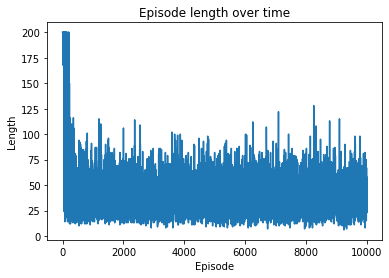

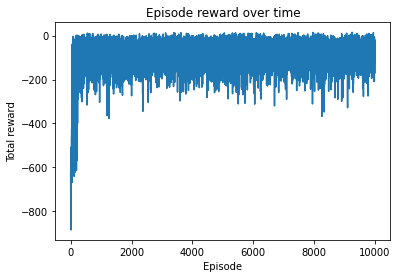

In [9]:
#plotting length and total reward for each episode over time.
plt.plot(length_episode)
plt.title('Episode length over time')
plt.xlabel('Episode')
plt.ylabel('Length')
plt.show()

plt.plot(total_reward_episode)
plt.title('Episode reward over time')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()